Steps:
   1. Import Libraries  
   2. Load data from QUANDL
   3. Check the data and reset index if needed
   4. plot the line chart
   5. Smoothen the data (as I had data taken almost every day, but then I converted the frequency to monthly)
   6. Plot the line graph
   7. Check for the missing values/ duplicates
   8. Decompose the time series
   9. Check for Stationarity using dickey_fuller test and Autocorrelation.
   10. Stationarize the data based on the results.

    #Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
                             # statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
                                  # feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '1uVusYourkeyqx_aQh'

In [121]:
#A comprehensive collection of crude oil prices declared by oil-producing countries over time. The table is QDL/OPEC 
# and has two columns date and value 

data = quandl.get_table('QDL/OPEC')

In [171]:
data.head()

,date,value
None,,
0,2023-12-20,81.24
1,2023-12-19,79.19
2,2023-12-18,78.47
3,2023-12-15,78.03
4,2023-12-14,76.77


In [172]:
data.shape

(5411, 2)

In [173]:
data.columns

Index(['date', 'value'], dtype='object')

    # Since I retrieved the table as a whole, I have two columns date and value. 
     I have to now change the date column as the index so that I can do analysis on value.

In [176]:
data_sub = data.loc[(data['date'] >= '2003-02-01') & (data['date'] <= '2023-12-19')]

In [177]:
# Set the "date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime').asfreq('M') # Set the datetime as the index of the dataframe.
#data_sub.index.freq = 'M'

data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.



In [178]:
print(data_sub.index)

DatetimeIndex(['2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31',
               '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30',
               '2003-10-31', '2003-11-30',
               ...
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', name='datetime', length=250, freq='M')


In [179]:
data_sub.head()

,value
datetime,
2003-02-28,32.63
2003-03-31,27.22
2003-04-30,23.72
2003-05-31,NaN
2003-06-30,27.11


In [180]:
data_sub.shape

(250, 1)

In [181]:
data_sub.columns

Index(['value'], dtype='object')

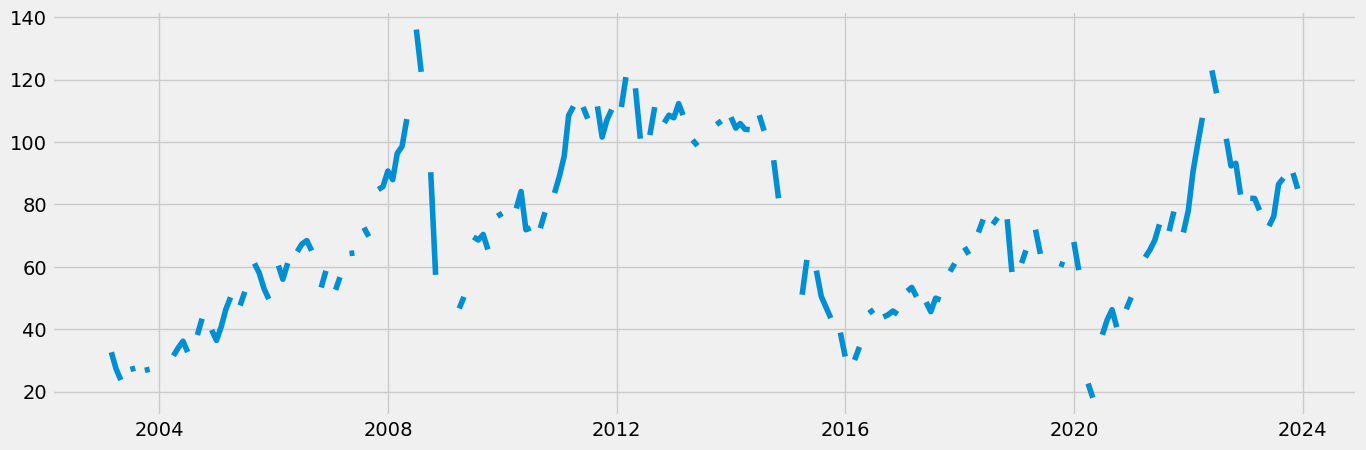

In [182]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub)

    # smoothing the data

In [183]:
import pandas as pd

# data_sub is your DataFrame with a numerical column named 'values'
span = 10  # Adjust the span as needed

# Calculate the exponential moving average and create a new column 'smoothed_values'
data_sub['value'] = data_sub['value'].ewm(span=span).mean()

# Drop NaN values resulting from the EMA calculation
data_sub = data_sub.dropna()


In [184]:
data_sub.head()

,value
datetime,
2003-02-28,32.630000
2003-03-31,29.654500
2003-04-30,27.268870
2003-05-31,27.268870
2003-06-30,27.209262


In [154]:
#data_sub = data_sub.drop(columns = ['smoothed_values'])

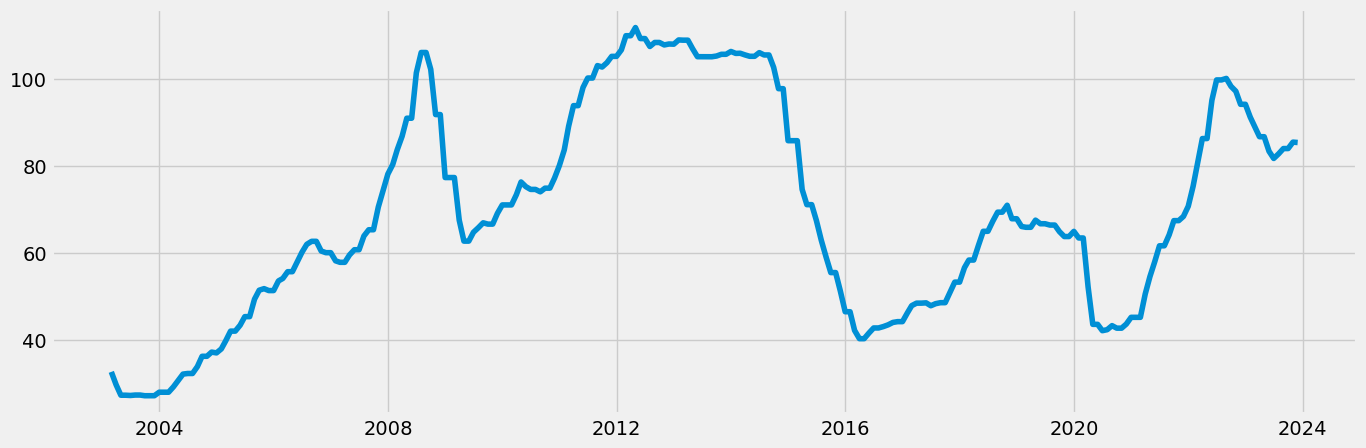

In [185]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub)

    #Check for missing values

In [190]:
# checking for missing values
data_sub.isnull().sum() 

value    0
dtype: int64

In [188]:
print(data_sub.index)

DatetimeIndex(['2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31',
               '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30',
               '2003-10-31', '2003-11-30',
               ...
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', name='datetime', length=250, freq='M')


In [189]:
data_sub.describe()

,value
count,250.000000
mean,69.277328
std,24.187382
min,27.151341
25%,48.723105
50%,66.456532
75%,89.042941
max,111.711259


In [135]:
data_sub.median()

value    66.975
dtype: float64

In [138]:
data_sub['value'].fillna(66.975, inplace=True)

In [116]:
#data_sub.dropna(inplace = True)

In [191]:
# Check for duplicates

dups = data_sub[data_sub.duplicated()]
dups.sum()

value    4893.224738
dtype: float64

In [81]:
dups

,value
datetime,
2023-10-05,88.54
2023-07-26,84.82
2023-04-10,85.50
2023-04-04,85.50
2023-03-24,74.60
...,...
2003-03-03,31.63
2003-02-27,32.48
2003-02-19,31.95


    #I am not doing anything on the duplicates because there are chances that there is same value for 2 different days.

In [192]:
type(data_sub)

pandas.core.frame.DataFrame

    # Time Series Decomposition

In [193]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [194]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

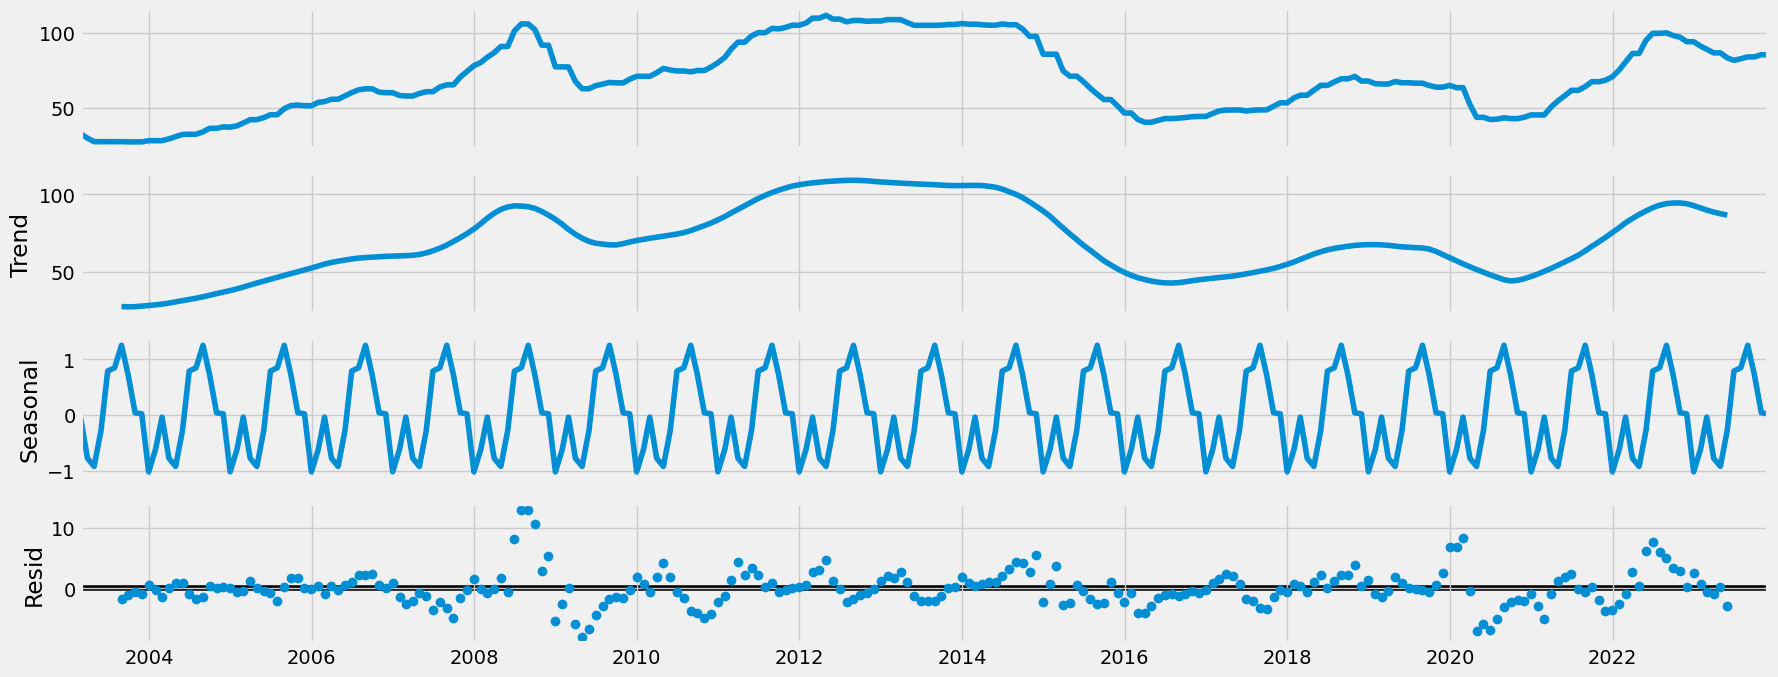

In [195]:
# Plot the separate components

decomposition.plot()
plt.show()

Inference:
1. Level is the data itself.
2. Trend is the smoothened version of level (as we did smoothen the data)
3. Data seems to have seasonality
4. Residue also present.

    # Check for Stationarity

In [196]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.727013
p-value                          0.069479
Number of Lags Used              3.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


    #Inference:
    Test Static is higher than critical value (1% and 5%), so there appears to be non stationarity.
    Test statistic larger than critical value = can’t reject null hypothesis
    
    #Null Hypothesis:
    There is no root in the data and hence stationary to proceed with forecasting.

    # Finding:
    There is a unit root in your data, and your data is non-stationary.


    #Check for Autocorrelation

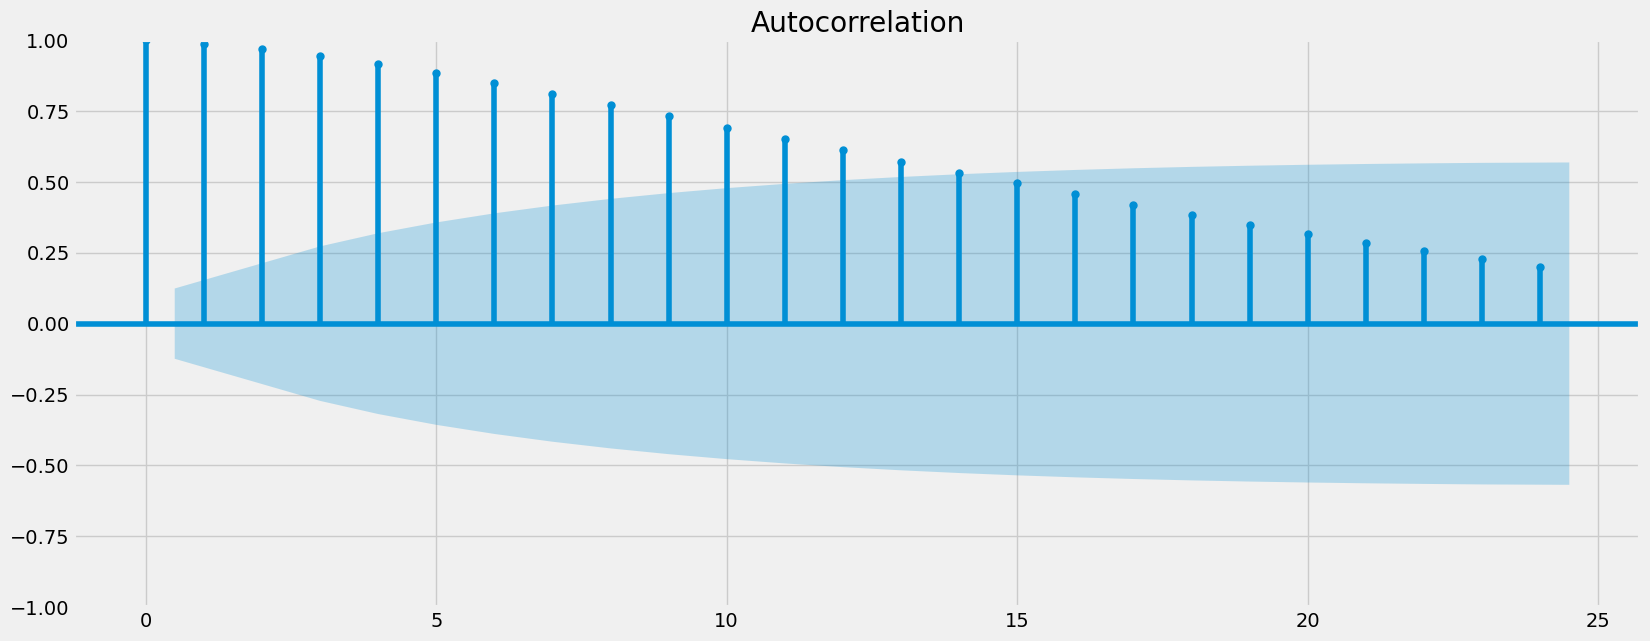

In [197]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

    There are many lags above the confidence interval edge, which means there are many lags significantly correlated with each 
    other (or there is a lot of autocorrelated data, supporting the result of the Dickey-Fuller test)
    OR
    #More than 10 data lines fall outside of the blue area, so there is non-stationarity.

    #Stationarizing Time Series Data

In [198]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = data_sub - data_sub.shift(1) 

In [199]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [200]:
data_diff.head()

,value
datetime,
2003-03-31,-2.975500
2003-04-30,-2.385630
2003-05-31,0.000000
2003-06-30,-0.059608
2003-07-31,0.097696


In [201]:
data_diff.columns

Index(['value'], dtype='object')

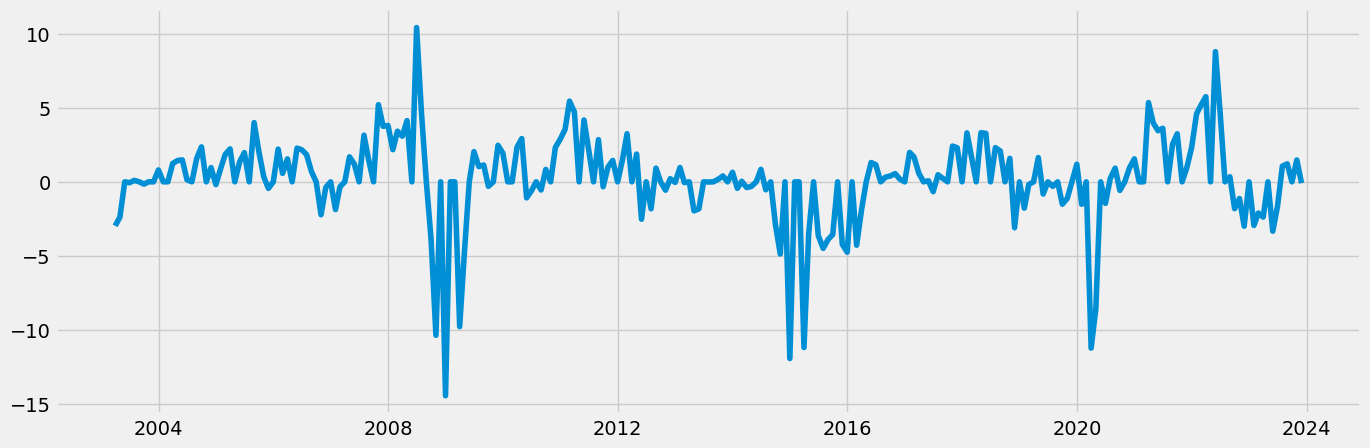

In [202]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [203]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.834634
p-value                          0.000047
Number of Lags Used              2.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


    #Inference:
    Test Static is lower than critical value (1% and 5%), so there appears to be stationarity.
    Test statistic lower than critical value = reject null hypothesis
    
    #Null Hypothesis:
    There is no root in the data and hence stationary to proceed with forecasting.

    # Finding:
    There is no unit root in your data, and your data is stationary.

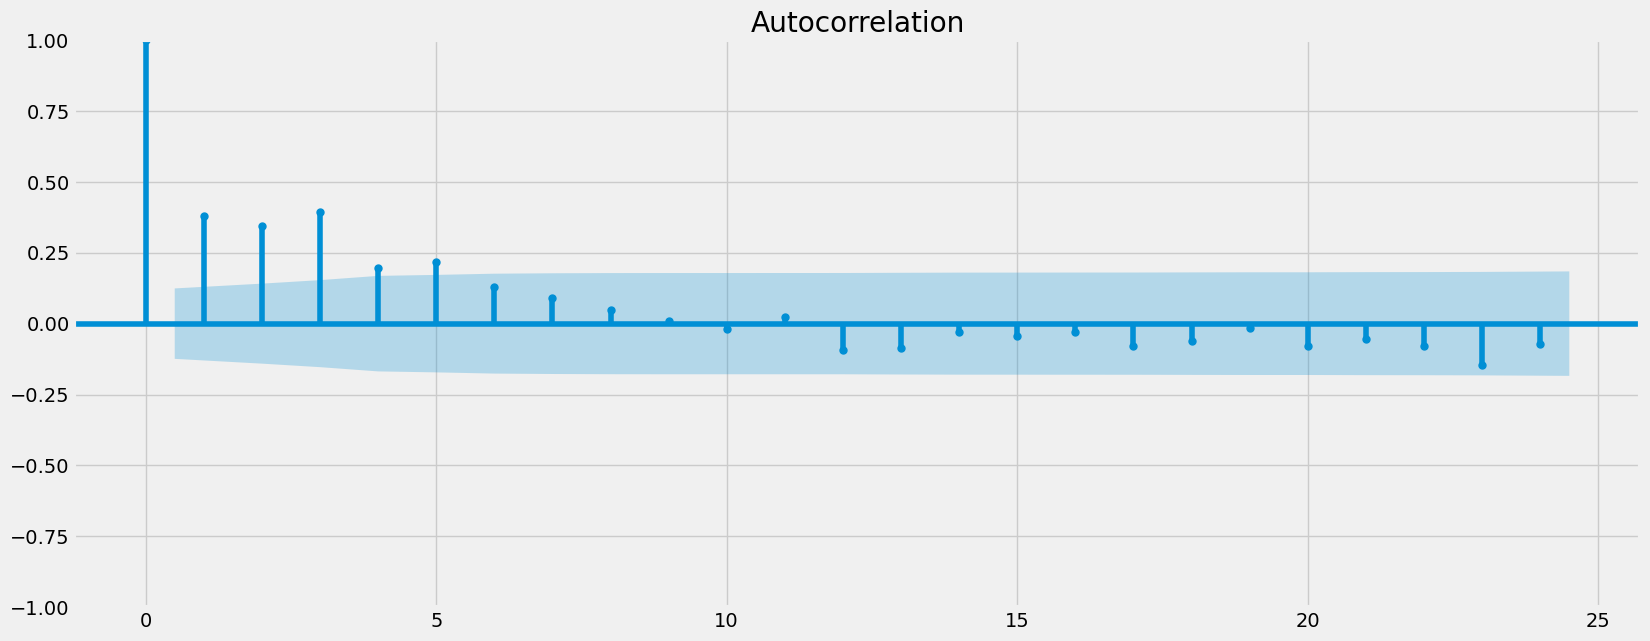

In [204]:
plot_acf(data_diff)
plt.show()

    There are less than 10 lags above the confidence interval edge, which means there are not much correlated data supporting  the result of the Dickey-Fuller test.
    The data is now stationary.